In [1]:
import numpy as np

import rnnfunctions as fs
import tensorflow as tf
import config

In [13]:
b = 0
objects = config.DRAWING_NAMES2
data, labels = fs.load_data(limit_per_class=config.LOAD_DRAWINGS_FROM_EACH_FILE + b, beginning=b, class_names=objects)

Loading data from ./data/nparrays/aircraft carrier.npy
Loading data from ./data/nparrays/airplane.npy
Loading data from ./data/nparrays/alarm clock.npy
Loading data from ./data/nparrays/ambulance.npy
Loading data from ./data/nparrays/angel.npy
Loading data from ./data/nparrays/animal migration.npy
Loading data from ./data/nparrays/ant.npy
Loading data from ./data/nparrays/anvil.npy
Loading data from ./data/nparrays/apple.npy
Loading data from ./data/nparrays/arm.npy
Loading data from ./data/nparrays/asparagus.npy
Loading data from ./data/nparrays/axe.npy
Loading data from ./data/nparrays/backpack.npy
Loading data from ./data/nparrays/banana.npy
Loading data from ./data/nparrays/bandage.npy
Loading data from ./data/nparrays/barn.npy
Loading data from ./data/nparrays/baseball.npy
Loading data from ./data/nparrays/baseball bat.npy
Loading data from ./data/nparrays/basket.npy
Loading data from ./data/nparrays/basketball.npy
Converting to nparray


In [14]:
x_train, x_test, y_train, y_test = fs.split_data(data, labels)

In [4]:
model = fs.create_rnn_model(x_train.shape[1:], len(config.DRAWING_NAMES2))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 60, 256)        │       134,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 60, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 345)            │        44,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 458,329 (1.75 MB)

 Trainable params: 458,329 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
fs.train_model(model, x_train, y_train, x_test, y_test, epochs=5)

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.2175 - loss: 2.4716 - val_accuracy: 0.2168 - val_loss: 2.4695 - learning_rate: 0.0010
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.2317 - loss: 2.4302 - val_accuracy: 0.2872 - val_loss: 2.2393 - learning_rate: 0.0010
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.2597 - loss: 2.3687 - val_accuracy: 0.2663 - val_loss: 2.2754 - learning_rate: 0.0010
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.2814 - loss: 2.3096 - val_accuracy: 0.3275 - val_loss: 2.1463 - learning_rate: 0.0010
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.2918 - loss: 2.2822 - val_accuracy: 0.3463 - val_loss: 2.0738 - learning_rate: 0.0010


In [6]:
model.save("RNN.keras")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class predictions

32344/32344 ━━━━━━━━━━━━━━━━━━━━ 1300s 40ms/step


In [6]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

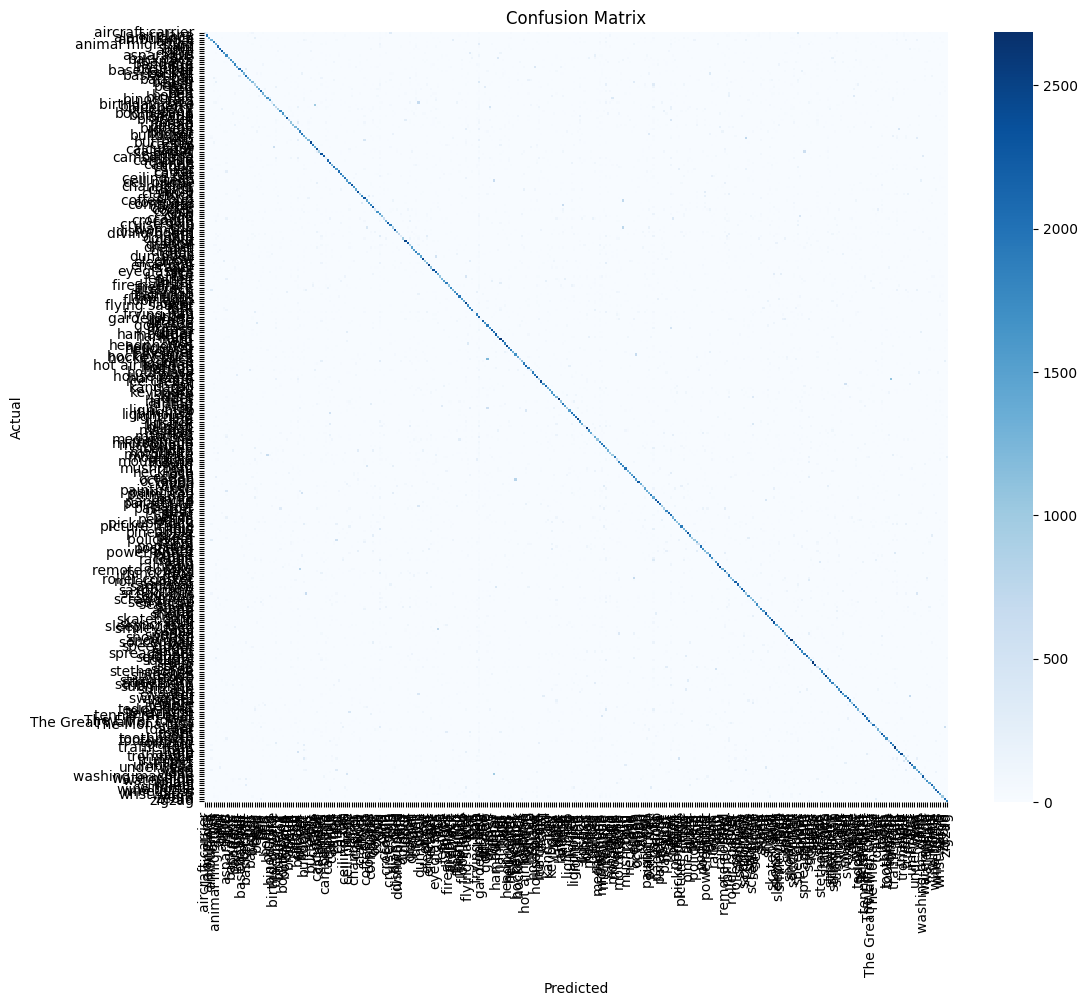

                         precision    recall  f1-score   support

       aircraft carrier       0.24      0.12      0.16      3016
               airplane       0.66      0.65      0.66      3014
            alarm clock       0.72      0.44      0.54      3036
              ambulance       0.46      0.44      0.45      2933
                  angel       0.52      0.63      0.57      3002
       animal migration       0.29      0.45      0.35      2973
                    ant       0.60      0.70      0.64      2933
                  anvil       0.67      0.68      0.67      3010
                  apple       0.81      0.75      0.78      3038
                    arm       0.61      0.53      0.57      3028
              asparagus       0.35      0.60      0.44      2971
                    axe       0.80      0.36      0.50      2993
               backpack       0.72      0.56      0.63      3007
                 banana       0.61      0.50      0.55      3067
                bandage 

In [7]:
# Visualize the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=objects, yticklabels=objects)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=objects))

In [ ]:
objects = config.DRAWING_NAMES2[:20]
data, labels = fs.load_data(limit_per_class=config.LOAD_DRAWINGS_FROM_EACH_FILE, beginning=0, class_names=objects)
x_train, x_test, y_train, y_test = fs.split_data(data, labels)
model = fs.create_rnn_model(x_train.shape[1:], len(objects))
fs.train_model(model, x_train, y_train, x_test, y_test, epochs=5)

Loading data from ./data/nparrays/aircraft carrier.npy
Loading data from ./data/nparrays/airplane.npy
Loading data from ./data/nparrays/alarm clock.npy
Loading data from ./data/nparrays/ambulance.npy
Loading data from ./data/nparrays/angel.npy
Loading data from ./data/nparrays/animal migration.npy
Loading data from ./data/nparrays/ant.npy
Loading data from ./data/nparrays/anvil.npy
Loading data from ./data/nparrays/apple.npy
Loading data from ./data/nparrays/arm.npy
Loading data from ./data/nparrays/asparagus.npy
Loading data from ./data/nparrays/axe.npy
Loading data from ./data/nparrays/backpack.npy
Loading data from ./data/nparrays/banana.npy
Loading data from ./data/nparrays/bandage.npy
Loading data from ./data/nparrays/barn.npy
Loading data from ./data/nparrays/baseball.npy
Loading data from ./data/nparrays/baseball bat.npy
Loading data from ./data/nparrays/basket.npy
Loading data from ./data/nparrays/basketball.npy
Converting to nparray
Epoch 1/5
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
model.save("RNN20.keras")

In [ ]:
model = tf.keras.models.load_model("RNNall.keras")
objects = config.DRAWING_NAMES2
for b in range(10000, 20001, 1000):
    data, labels = fs.load_data(limit_per_class=1000 + b, beginning=b, class_names=objects)
    fs.train_model(model, x_train, y_train, x_test, y_test, epochs=10)

In [8]:
model.save("RNNall.keras")